## MELBOURNE HOUSING PRICE PREDICTION

#### Small supervised learning ML project to dust off the rust

In [9]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data Cleaning

In [3]:
# Import the dataset and rough viewing


melb1 = pd.read_csv('/home/user/Documents/Data Science/ML Projects/Melbourne-Housing/melb_data.csv')
melb1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [7]:
melb1.shape

(13580, 21)

In [4]:
# Print out all the columns

melb1.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
# Check for missing values


melb1.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
# The columns with missing values wont be used during prediction, and will be dropped

melb1 = melb1.drop(['Car', 'BuildingArea', 'YearBuilt', 'CouncilArea'], axis=1)
melb1.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

<Axes: xlabel='Price'>

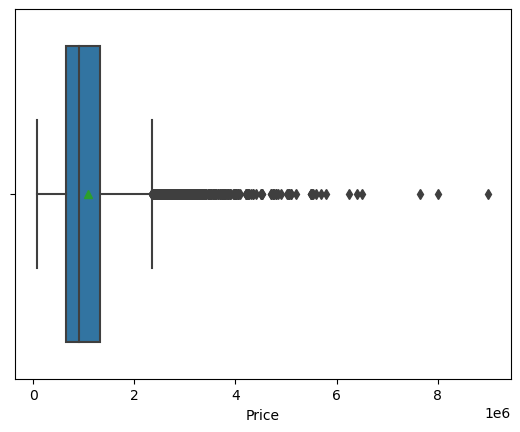

In [10]:
# Plot some outliers to view extremely expensive houses

sns.boxplot(x=melb1['Price'], showmeans = True)

<Axes: xlabel='Landsize'>

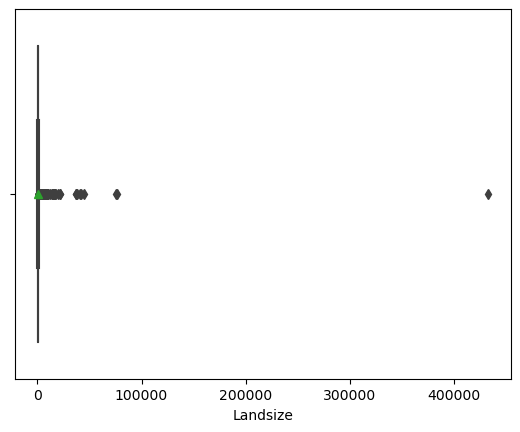

In [11]:
# Plot some outliers to view extremely big houses

sns.boxplot(x=melb1['Landsize'], showmeans = True)

<Axes: xlabel='Landsize'>

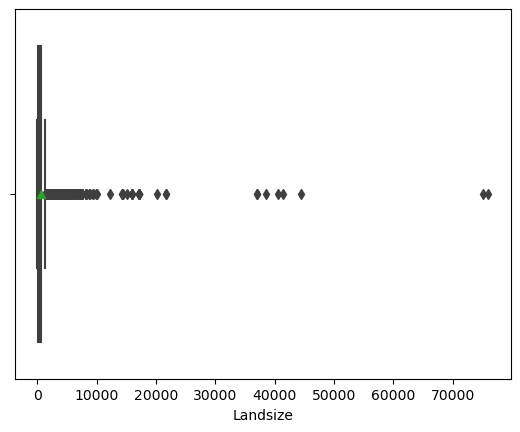

In [12]:
melb1 = melb1[melb1['Landsize']<400000]
sns.boxplot(x=melb1['Landsize'], showmeans = True)


### Analysis

<Axes: >

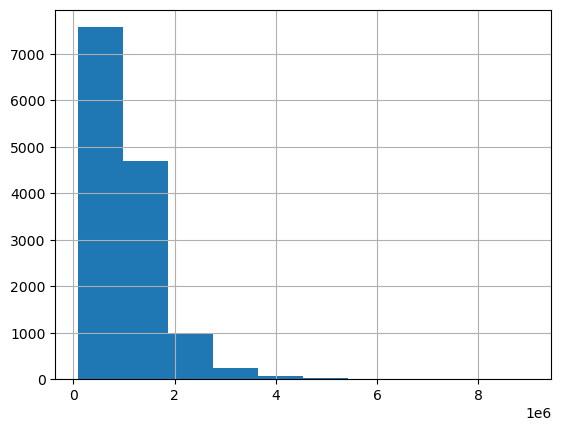

In [15]:
# View distribution of the house prices

melb1['Price'].hist()

In [23]:
# Avg price of houses

melb1['Price'].mean()

1075564.4597540319

In [24]:
# modal price

melb1['Price'].mode()

0    1100000.0
Name: Price, dtype: float64

In [25]:
# average lot size

melb1['Landsize'].mean()

526.5687458575742

In [30]:
# How old is the newest home

melb1.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Landsize         float64
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [31]:
# date to datetime

melb1['Date'] = pd.to_datetime(melb1['Date'])
melb1.dtypes

/tmp/ipykernel_124856/4215429875.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  melb1['Date'] = pd.to_datetime(melb1['Date'])


Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Landsize                float64
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
dtype: object

In [35]:
newest_home = melb1.loc[melb1['Date'].idxmax()]
newest_home

Suburb                      Abbotsford
Address                 143 Charles St
Rooms                                3
Type                                 h
Price                        1635000.0
Method                               S
SellerG                         Nelson
Date               2017-12-08 00:00:00
Distance                           3.0
Postcode                        3067.0
Bedroom2                           3.0
Bathroom                           1.0
Landsize                         142.0
Lattitude                    -37.80359
Longtitude                   144.99538
Regionname       Northern Metropolitan
Propertycount                   4019.0
Name: 10876, dtype: object

In [41]:
current_date = pd.to_datetime('today')


age_of_newest_home = (current_date - newest_home['Date']).days // 365
print(f'the newest home is : {age_of_newest_home} years old')

the newest home is : 5 years old
